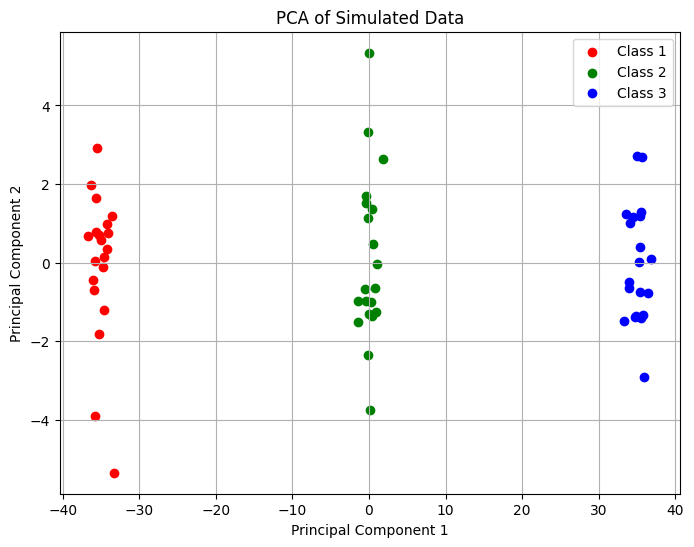

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0


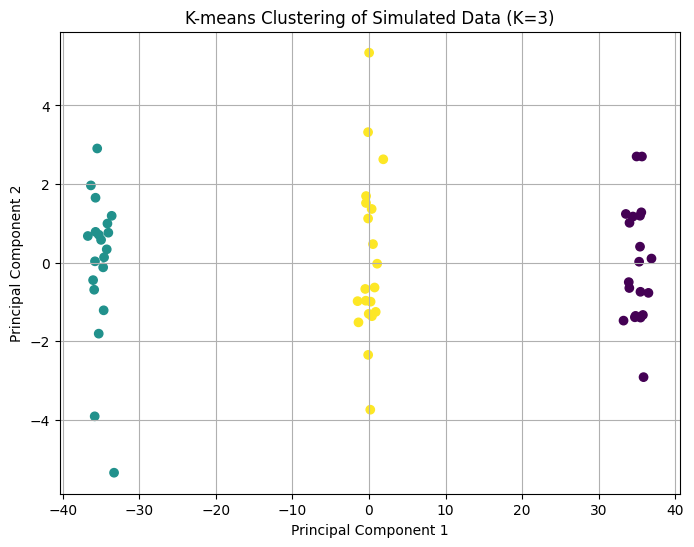

KMeans Label   0   1
True Label          
0              0  20
1             10  10
2             20   0


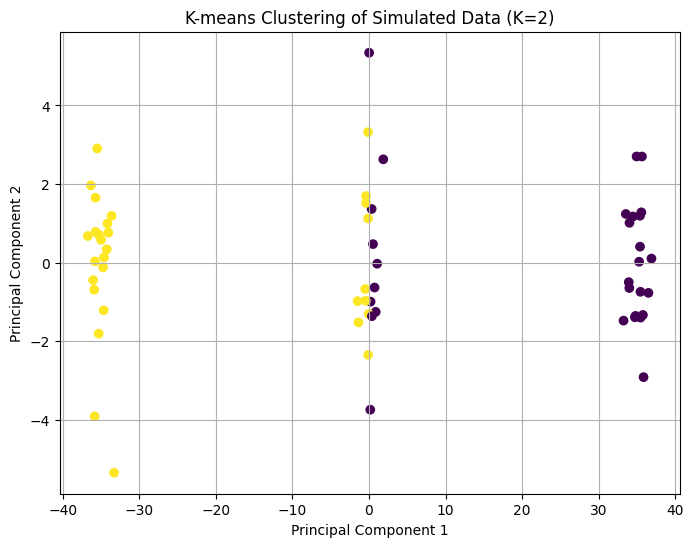

KMeans Label   0   1  2   3
True Label                 
0              0  20  0   0
1              0   0  6  14
2             20   0  0   0


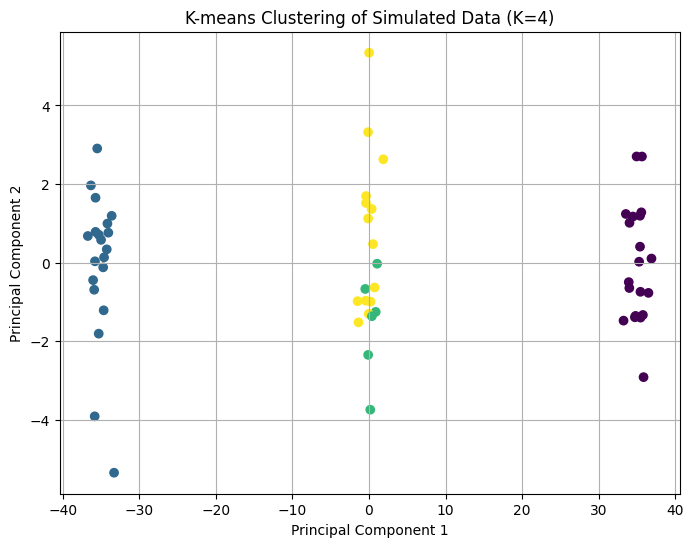

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0


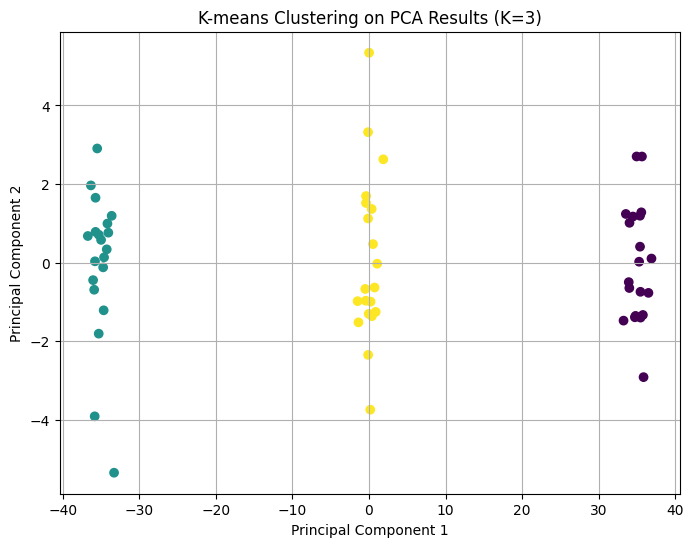

KMeans Label   0   1   2
True Label              
0              0  20   0
1              0   0  20
2             20   0   0


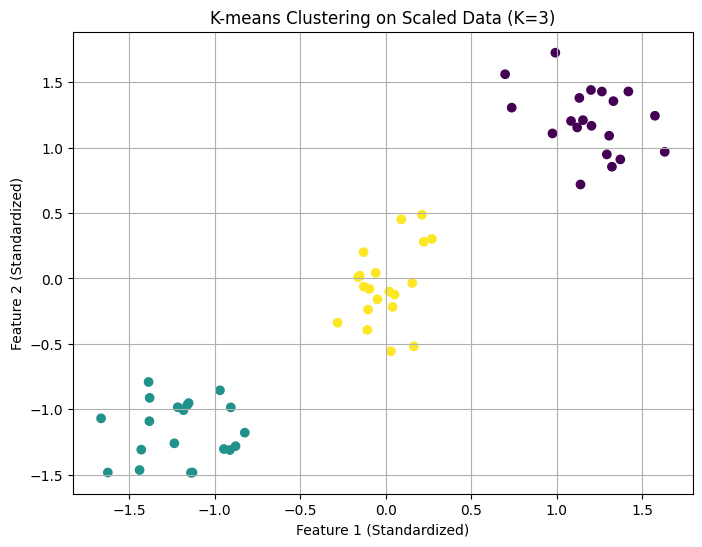

In [13]:
##1. (a) 生成模擬數據 (Generate Simulated Data)
##我們生成具有 20 個觀察值的 3 個類別，每個觀察值具有 50 個特徵。每個類別的觀察值在均值上有不同的偏移，使得它們彼此區分開來。
##We generate 3 classes of 20 observations each, with 50 features per observation. Each class has a different mean shift to ensure they are distinguishable from one another.

import numpy as np

np.random.seed(25)
n_samples = 20
n_features = 50

# 生成三個類別的數據，均值不同以便區分
class_1 = np.random.normal(loc=0, scale=1, size=(n_samples, n_features))
class_2 = np.random.normal(loc=5, scale=1, size=(n_samples, n_features))
class_3 = np.random.normal(loc=10, scale=1, size=(n_samples, n_features))

# 合併三個類別的數據
data = np.vstack([class_1, class_2, class_3])

##2. (b) 進行 PCA 並繪製前兩個主成分得分向量 (Perform PCA and Plot First Two Principal Components)
##這一步我們使用 PCA 分析數據，並繪製前兩個主成分，並使用不同的顏色來區分三個類別。
##We apply PCA on the data and plot the first two principal components, using different colors for the three classes.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 進行 PCA，取前兩個主成分
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# 繪製前兩個主成分得分向量
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:n_samples, 0], pca_result[:n_samples, 1], c='r', label='Class 1')
plt.scatter(pca_result[n_samples:2*n_samples, 0], pca_result[n_samples:2*n_samples, 1], c='g', label='Class 2')
plt.scatter(pca_result[2*n_samples:, 0], pca_result[2*n_samples:, 1], c='b', label='Class 3')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Simulated Data')
plt.legend()
plt.grid(True)
plt.show()

##3. (c) 執行 K-means 聚類，K=3 (Perform K-means Clustering with K=3)
##接下來我們進行 K-means 聚類並比較聚類結果與真實標籤。注意 K-means 聚類的標籤是#隨機分配的，因此需要通過交叉表來對比真實類別和聚類結果。
##Next, we perform K-means clustering and compare the clustering results with the #true class labels. Note that K-means assigns cluster labels arbitrarily, so we use a #crosstab to compare.
import pandas as pd
from sklearn.cluster import KMeans

# 真實標籤
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# K-means 聚類，K=3
kmeans = KMeans(n_clusters=3, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

# 比較真實標籤和 K-means 標籤
comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])
print(cross_tab)

# 繪製 K-means 聚類結果
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=3)')
plt.grid(True)
plt.show()

##結果解釋 (Results Explanation)：
##K-means 聚類的結果與真實標籤完全一致，這說明三個類別可以通過聚類準確區分。
##The K-means clustering results perfectly match the true class labels, indicating that the three classes are well-separated.

##4. (d) K=2 的 K-means 聚類 (K-means Clustering with K=2)
##當設置 K=2 時，聚類會把相距較遠的類別分成不同的群集，而中間的類別會被拆分成兩##部分。
##With K=2, the distant groups in the data are still separated, but the middle group is ##split into two clusters.
kmeans = KMeans(n_clusters=2, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])
print(cross_tab)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=2)')
plt.grid(True)
plt.show()


#5. (e) K=4 的 K-means 聚類 (K-means Clustering with K=4)
#當 K=4 時，中間的類別被進一步拆分，顯示出四個群集。
#With K=4, the middle group is further split into additional clusters, showing four #distinct clusters.
kmeans = KMeans(n_clusters=4, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])
print(cross_tab)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Simulated Data (K=4)')
plt.grid(True)
plt.show()


##6. (f) 在 PCA 得分上進行 K=3 的 K-means 聚類 (K-means Clustering on PCA Scores with ##K=3)
##這次我們在前兩個主成分上進行 K-means 聚類，結果與直接在原始數據上聚類相似。
##This time we perform K-means clustering on the first two principal components, and ##the results are similar to clustering on the raw data.

kmeans_pca = KMeans(n_clusters=3, random_state=25)
kmeans_labels_pca = kmeans_pca.fit_predict(pca_result)

comparison_df_pca = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels_pca})
cross_tab_pca = pd.crosstab(comparison_df_pca['True Label'], comparison_df_pca['KMeans Label'])
print(cross_tab_pca)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA Results (K=3)')
plt.grid(True)
plt.show()


##7. (g) 標準化後進行 K=3 的 K-means 聚類 (K-means Clustering on Scaled Data with ##K=3)
##使用標準化後的數據進行 K-means 聚類，結果顯示數據點的聚集效果更好，但分類結果與##未標準化時一致。
##We perform K-means clustering after scaling the data. The points are more clustered, ##but the classification results remain consistent.

from sklearn.preprocessing import StandardScaler

# 標準化數據
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans_scaled = KMeans(n_clusters=3, random_state=25)
kmeans_labels_scaled = kmeans_scaled.fit_predict(data_scaled)

comparison_df_scaled = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels_scaled})
cross_tab_scaled = pd.crosstab(comparison_df_scaled['True Label'], comparison_df_scaled['KMeans Label'])
print(cross_tab_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_labels_scaled)
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means Clustering on Scaled Data (K=3)')
plt.grid(True)
plt.show()
